In [1]:
import numpy as np
import csv
import glob
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]

from os import listdir
        
# content = content.decode('utf-8')         



# test_data = np.genfromtxt('./data_export_cobercat/data_export_1-2015.csv',skip_header=1,delimiter=',', dtype=None, names=['timestamp','date','lat','lng','signal_inst','signal_min','signal_max','signal_avg','carrier','fullCarrier','status','net','net_type','lac','cid','psc','speed,satellites','precision1','provider','activity','incident','downloadSpeed','uploadSpeed'],filling_values=(-1))

In [2]:
class cell_user:
    '''Holds data for each user'''
    
    def __init__(self, inpu):
        self.timestamp = int(inpu[0])
        self.date = inpu[1]
#         self.datetime = datetime.strptime(self.date, '%Y-%m-%d %H:%M:%S.%f')
#         self.datetime = datetime(self.timestamp)
        try:
            self.datetime = datetime.fromtimestamp(self.timestamp/1000.0)
        except:
            pass

        self.lat = float(inpu[2])
        self.lng = float(inpu[3])
        self.signal_inst = int(inpu[4])
        self.signal_min = int(inpu[5])
        self.signal_max = int(inpu[6])
        self.signal_avg = int(inpu[7])
        self.carrier = unicode(inpu[8])
        self.fullCarrier = unicode(inpu[9])
        self.status = int(inpu[10])
            
#         self.status = int(inpu[10])
        self.net = int(inpu[11])
        self.net_type = inpu[12]
        self.lac = int(inpu[13])
        self.cid = int(inpu[14])
        self.psc = int(inpu[15])
        self.speed = float(inpu[16])
        self.satellites = int(inpu[17])
        self.precision1 = int(inpu[18])
        self.provider = inpu[19]
        self.activity = int(inpu[20])
        try:
            self.incident = inpu[21]
            if len(self.incident) == 0:
                self.incident = -1
            
        except:
            self.incident = -1
            
        try:
            self.downloadSpeed = inpu[22]
            self.uploadSpeed = inpu[23]
            
        except:
            self.downloadSpeed = -1
            self.uploadSpeed = -1
        
        
        
    def __str__(self):
        '''return the name upon str(object)'''
        return str(self.timestamp)


In [3]:
def average_attr(list_of_phones, attr):
    """averages that attribute in the list"""
    total = 0
    n = 0
    for x in list_of_phones:
#         try:
            attrStr = 'x.'+attr
            total += float(eval(attrStr))
            n += 1
        
#         except:
#             pass
    
    average = total/float(n)

    return average
    

In [4]:
def keys_and_incidences(list_of_phones, attr):
    """finds each key and the number of incidences"""
    key_incid = {}
    for x in list_of_phones:
        strEval = 'x.'+attr
        label = eval(strEval)
        try:
            key_incid[label] += 1
        
        except:
            key_incid[label] = 1
    


    return key_incid

In [5]:
def just_values(list_of_phones, attr):
    """finds each key and the number of incidences"""
    values = []
    for x in list_of_phones:
        strEval = 'x.'+attr
        value = eval(strEval)
        values.append(value)
    


    return values

In [6]:
def plot_bars(list_of_phones, attr):
    """Plots each key with the number of incidences"""
    
    k_c = keys_and_incidences(list_of_phones, attr)
    plt.bar(range(len(k_c)), k_c.values(), align='center')
    plt.xticks(rotation=90)
    plt.xticks(range(len(k_c)), k_c.keys())
    title = "Breakdown of "+str(attr)
    plt.title(title)
    plt.xlabel("Labels")
    plt.ylabel("Frequency")
    plt.show()

In [7]:
def plot_hist(list_of_phones, attr):
    """Plots a histogram for that attribute"""
    
#     k_c = keys_and_incidences(list_of_phones, attr)
    values = just_values(list_of_phones,attr)
    
    n, bins, patches = plt.hist(values, 5, normed=1, facecolor='green', alpha=0.75)
    
#     plt.bar(range(len(k_c)), k_c.values(), align='center')
#     plt.xticks(rotation=90)
#     plt.xticks(range(len(k_c)), k_c.keys())
    title = "Breakdown of "+str(attr)
    plt.title(title)
    xlab = "Value of "+attr
    plt.xlabel(xlab)
    plt.ylabel("Frequency")
    plt.show()

In [8]:
def import_all_data(folder):
    """Imports all the data from the folder"""
    searchTerm = folder + "*.csv"
    files = glob.glob(searchTerm)
    
    list_of_phone_data = []
    error_entries = []
    
    for fil in files:
        phone_data = open(unix, "r")
        phone_data_reader = csv.reader(phone_data, delimiter=',')
        phone_data_list = list(phone_data_reader)
        print fil
#         print len(list_of_phone_data)

        for x in phone_data_list[1:]:
            try:
                y = cell_user(x)
                list_of_phone_data.append (y)
#                 if len(list_of_phone_data)%100000 == 0:
#                     print y.date
#                     print y.datetime
            except:
                error_entries.append(str(x))
                
                
        phone_data.close()
                
    print "Total valid entries: " , len(list_of_phone_data)
    print "Ratio of invalid entries:" , len(error_entries)/float(len(list_of_phone_data))
    
    return list_of_phone_data,error_entries

In [9]:
unix = "./data_export_cobercat/data_export_1-2015.csv"

phone_data = open(unix, "r")
phone_data_reader = csv.reader(phone_data, delimiter=',')
phone_data_list = list(phone_data_reader)
list_of_phone_data = []
error_entries = []

for x in phone_data_list[1:]:
    try:
        y = cell_user(x)
        list_of_phone_data.append (y)
    except:
        error_entries.append(str(x))
        
phone_data.close()        
print list_of_phone_data[-1]
print len(error_entries)/float(len(list_of_phone_data))

1448865682652
0.00389511303859


In [10]:
for x in list_of_phone_data[-10:-5]:
    print x.uploadSpeed

In [11]:
sum = 0
count = 0
for x in list_of_phone_data:
    sum += float(getattr(x, "speed"))
    count += 1

In [12]:
print sum/count

26.1372163996


In [13]:
len(list_of_phone_data)

99612

In [14]:
print average_attr(list_of_phone_data, "precision1")

22.2305143959


In [15]:
k_c= keys_and_incidences(list_of_phone_data,'fullCarrier')

([<matplotlib.axis.XTick at 0x1065297d0>,
 <a list of 30 Text xticklabel objects>)

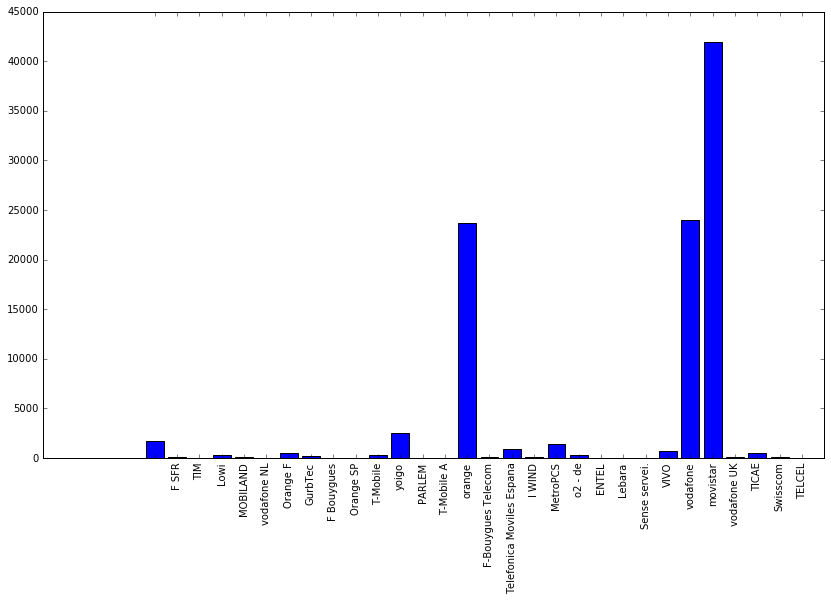

In [16]:
# plt.plot(k_c)

plt.bar(range(len(k_c)), k_c.values(), align='center')
plt.xticks(rotation=90)
plt.xticks(range(len(k_c)), k_c.keys())



In [17]:
print (k_c.values)



<built-in method values of dict object at 0x10b495a28>


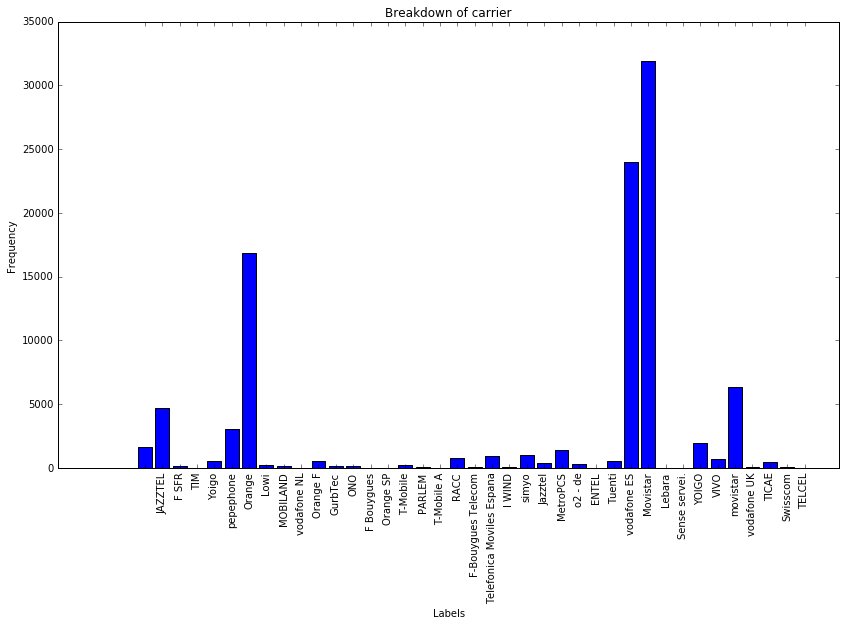

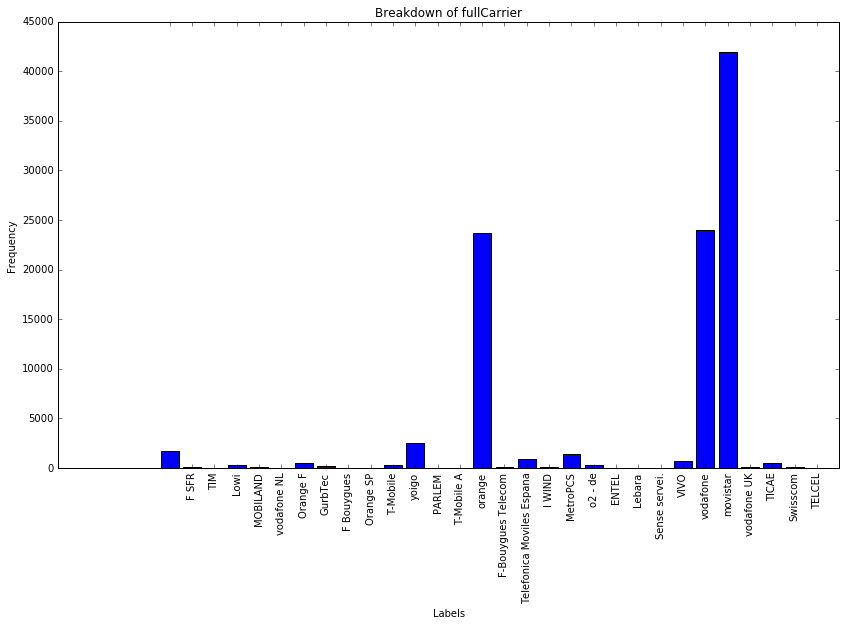

In [18]:
plot_bars(list_of_phone_data,'carrier')
plot_bars(list_of_phone_data,'fullCarrier')


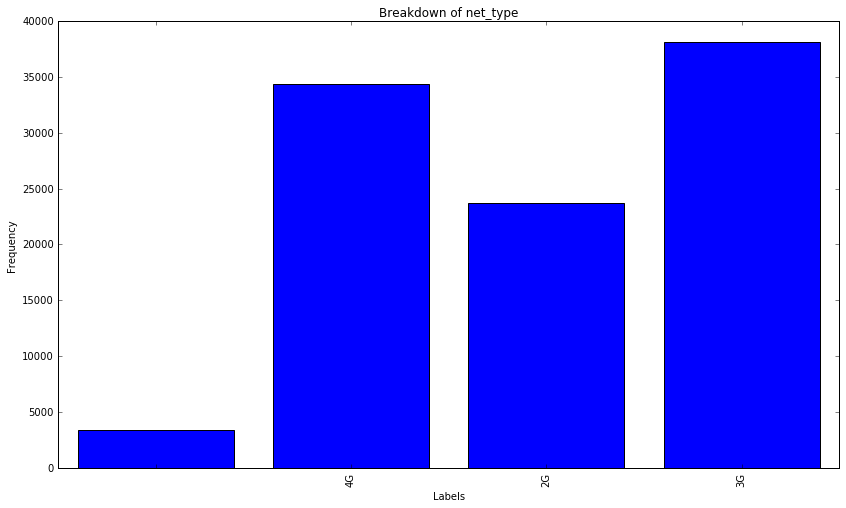

In [19]:
plot_bars(list_of_phone_data,'net_type')


In [20]:
all_data = import_all_data("./data_export_cobercat/")[0]

./data_export_cobercat/data_export_01-2015.csv
./data_export_cobercat/data_export_01-2016.csv
./data_export_cobercat/data_export_02-2015.csv
./data_export_cobercat/data_export_02-2016.csv
./data_export_cobercat/data_export_03-2015.csv
./data_export_cobercat/data_export_03-2016.csv
./data_export_cobercat/data_export_04-2015.csv
./data_export_cobercat/data_export_04-2016.csv
./data_export_cobercat/data_export_05-2015.csv
./data_export_cobercat/data_export_05-2016.csv
./data_export_cobercat/data_export_06-2015.csv
./data_export_cobercat/data_export_06-2016.csv
./data_export_cobercat/data_export_07-2015.csv
./data_export_cobercat/data_export_07-2016.csv
./data_export_cobercat/data_export_08-2015.csv
./data_export_cobercat/data_export_08-2016.csv
./data_export_cobercat/data_export_09-2015.csv
./data_export_cobercat/data_export_09-2016.csv
./data_export_cobercat/data_export_1-2015.csv
./data_export_cobercat/data_export_10-2015.csv
./data_export_cobercat/data_export_11-2015.csv
./data_export_

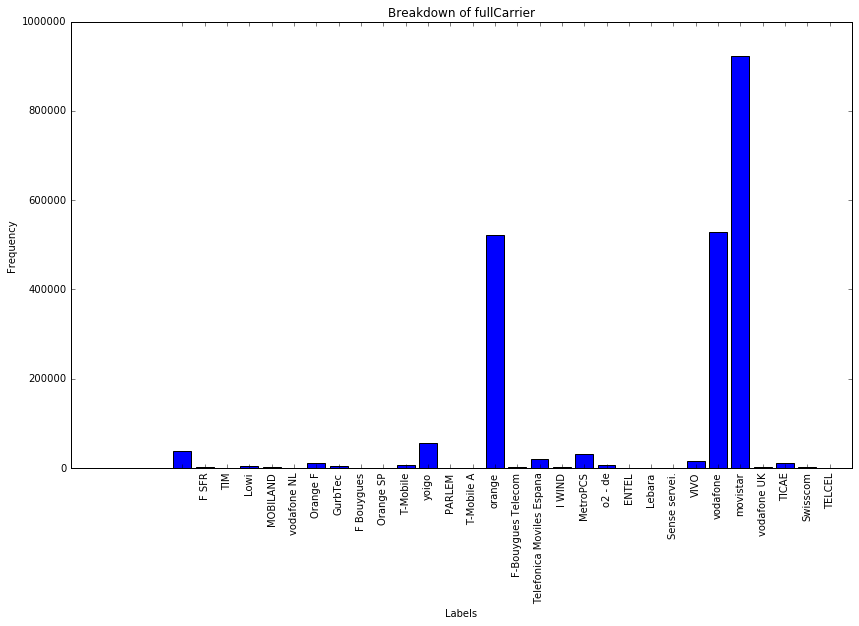

In [21]:
plot_bars(all_data,'fullCarrier')


In [22]:
print len(all_data)

2191464


In [23]:
average_attr(all_data, "speed")

26.137216399661575

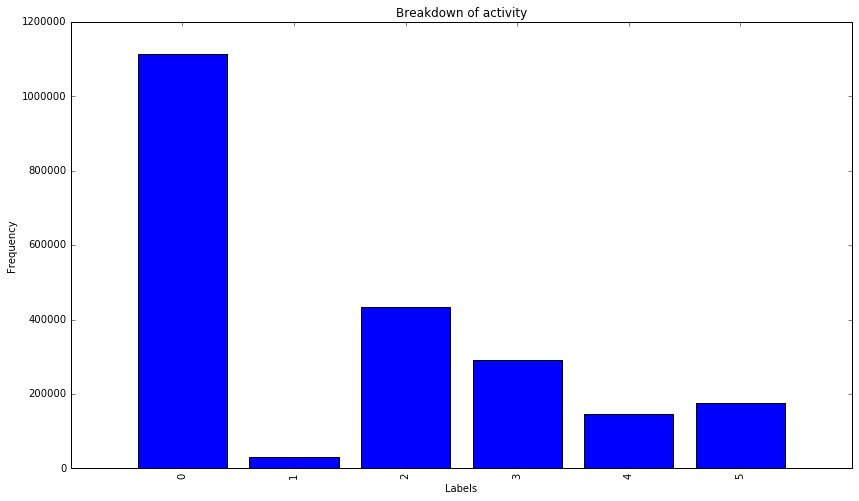

In [24]:
plot_bars(all_data, "activity")

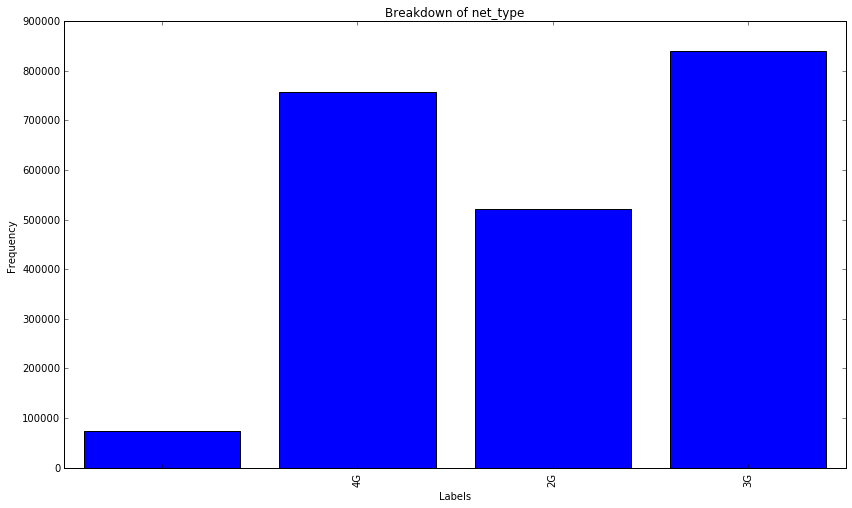

In [25]:
plot_bars(all_data,'net_type')

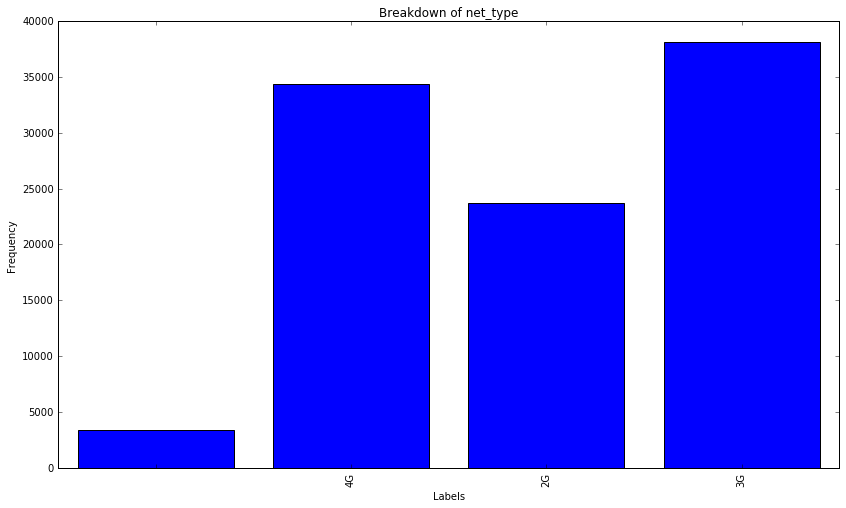

In [26]:
plot_bars(list_of_phone_data,'net_type')

In [27]:
# Next is to filter by data/maybe 
# n, bins, patches = plt.hist(all_data, 50, normed=1, facecolor='green', alpha=0.75)

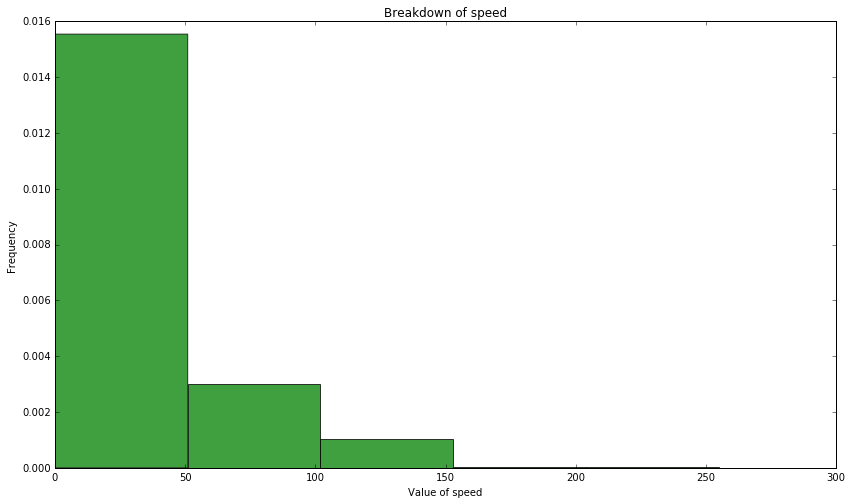

In [28]:
plot_hist(list_of_phone_data,'speed')

In [29]:
print all_data[1].date

2015-12-05 23:59:28.337000


In [41]:
# date_datetime = datetime.strptime(all_data[1].date, '%Y-%m-%d %H:%M:%S.%f')
# print date_datetime.timetuple()

time.struct_time(tm_year=2015, tm_mon=12, tm_mday=5, tm_hour=23, tm_min=59, tm_sec=28, tm_wday=5, tm_yday=339, tm_isdst=-1)


In [40]:
# print average_attr(all_data,'datetime')
print datetime.strftime(all_data[-1].datetime,'%S')

22


In [ ]:
plot_hist(all_data,'datetime.month')

In [ ]:
print all_data[-15000].date

In [ ]:
plot_bars(all_data,'datetime.day')
plot_bars(all_data,'datetime.month')
plot_bars(all_data,'datetime.year')



In [ ]:
plot_bars(all_data,'datetime.hour')
plot_bars(all_data,'datetime.minute')


In [ ]:
print average_attr(all_data,'datetime.hour')

In [ ]:
print 13.0752419387-12

In [ ]:
print average_attr(all_data,'signal_avg')
print average_attr(all_data,'signal_min')
print average_attr(all_data,'signal_max')



In [ ]:
print average_attr(all_data,'satellites')